# Best Advertising Markets for e-learning

The premise for this project is that of a e-learning company looking to invest money in advertising. Mainly offering courses on web and mobile development, the company also covers domains like data science, game development, etc. 

The main goal of this project is to determine which are the best two markets in which to advertise our product.

We could organize surveys for different markets to understand which would be best for advertising. However, this would be very costly and we will first look into finding a cheaper solution. Existing surveys may be relevant to our analysis. The candidate we will explore is data from [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/). A free online learning platform that offers courses on web development, freeCodeCamp also runs a popular Medium publication and their survey received reposnses from new coders in a wide variety of fields. 

The data from this survey can be found in this [GitHub Repo](https://github.com/freeCodeCamp/2017-new-coder-survey).


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Read csv file
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', dtype={17: str, 62: str})

In [13]:
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
survey.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Data columns (total 136 columns):
 #    Column                         Non-Null Count  Dtype  
---   ------                         --------------  -----  
 0    Age                            15367 non-null  float64
 1    AttendedBootcamp               17709 non-null  float64
 2    BootcampFinish                 1069 non-null   float64
 3    BootcampLoanYesNo              1079 non-null   float64
 4    BootcampName                   949 non-null    object 
 5    BootcampRecommend              1073 non-null   float64
 6    ChildrenNumber                 2314 non-null   float64
 7    CityPopulation                 15354 non-null  object 
 8    CodeEventConferences           1609 non-null   float64
 9    CodeEventDjangoGirls           165 non-null    float64
 10   CodeEventFCC                   1708 non-null   float64
 11   CodeEventGameJam               290 non-null    float64
 12   CodeEventGirlDev              

## 1. First Look and Analysis Questions
On first evaluation, the freeCodeCamp survey dataset has 18,175 rows and 136 columns. There are no columns without `NaN` values. The dataset contains information on:
* the age of the respondents 
* whether they attended a coding bootcamp or not 
* whether they finished the bootcamp 
* whether they took a loan for the bootcamp 
* the type of online resources they used (including different online learning platforms and YouTube/self-learning) 
* current employment information, desired job title 
* and much more. 

The dataset will be useful for answering our marketing questions without having to conduct a large-scale survey of our own.

### 1.1 Analysis Questions
As mentioned above, our company creates online learning content focused mainly on web and mobile development. However, we also produce content for other fields like data science, game development, etc. We are interested in answering questions about a population of new coders. We want to understand:
* Where new coders are located.
* Where are the locations with the most new coders.
* How much money new coders are willing to spend on learning.

Before we analyze the sample data in the freeCodeCamp survey, we need to verify that these data are representative for our population of interest and it has the right categories of people for our interest. 


### 1.2 Verify Data for population of interest
In order to understand whether these data are representative of the population we are interested in (new coders with varied fields of interest), we will look into the `JobRoleInterest` column. The column describes the job role(s) every participant is interested in working. First, we will generate a frequency table for the column. Then we will use that table to look into the following questions:
1. Are people interested in only one subject or they can be interested in more than one subject?
2. If most people are interested in more than one subject, is this sample still representative?
3. The focus of our courses is on web and mobile development. How many people are interested in at least one of these two subjects?

/var/folders/7z/wvq3201d0n58khft3ln7ks9w0000gn/T/ipykernel_25375/280768645.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  jobs_freq.index = jobs_freq.index.str.strip().str.replace(r"\s+", " ")


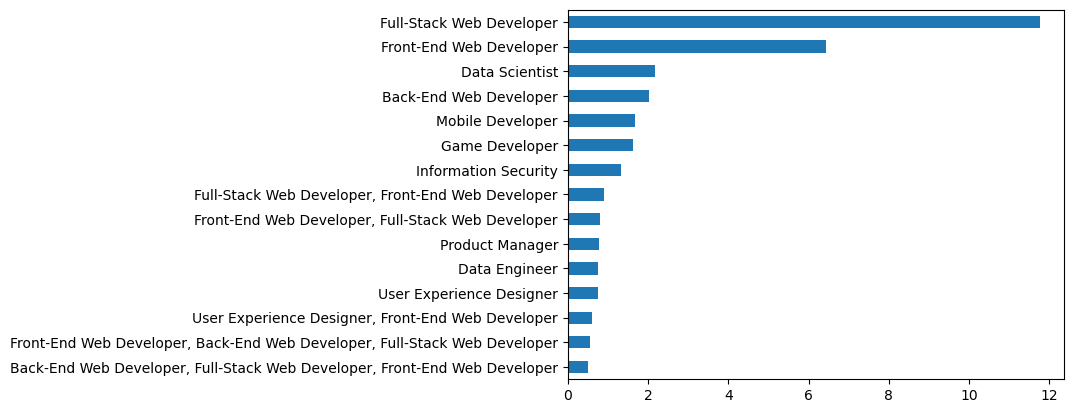

In [46]:
# Generate frequency distribution for JobRoleInterest (in percent)
jobs_freq = survey['JobRoleInterest'].value_counts(normalize=True) * 100
jobs_freq.index = jobs_freq.index.str.strip().str.replace(r"\s+", " ")
jobs_freq.iloc[:15].sort_values().plot.barh()
plt.show()

In [42]:
jobs_freq.head(20)

/var/folders/7z/wvq3201d0n58khft3ln7ks9w0000gn/T/ipykernel_25375/597886892.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  jobs_freq.index = jobs_freq.index.str.strip().str.replace(r"\s+", " ")


Full-Stack Web Developer                                                     11.770595
Front-End Web Developer                                                       6.435927
Data Scientist                                                                2.173913
Back-End Web Developer                                                        2.030892
Mobile Developer                                                              1.673341
Game Developer                                                                1.630435
Information Security                                                          1.315789
Full-Stack Web Developer, Front-End Web Developer                             0.915332
Front-End Web Developer, Full-Stack Web Developer                             0.800915
Product Manager                                                               0.786613
Data Engineer                                                                 0.758009
User Experience Designer                   

In [71]:
# Find percent of respondents interested in web or mobile development

area_of_interest = r'\s?,?(\bFull\-Stack Web Developer\b)|(\bFront\-End Web Developer\b)|(\bBack\-End Web Developer\b)|(\bMobile Developer\b),?\s?'
web_mobile_perc = jobs_freq[jobs_freq.index.str.contains(area_of_interest)]
total_web_mobile = web_mobile_perc.sum()
print(total_web_mobile)

86.24141876430205


/var/folders/7z/wvq3201d0n58khft3ln7ks9w0000gn/T/ipykernel_25375/2347561831.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  web_mobile_perc = jobs_freq[jobs_freq.index.str.contains(area_of_interest)]


In [91]:
# Split JobRoleInterest column into list of strings to find number of respondents interested in multiple fields

job_interest = survey['JobRoleInterest'].dropna()
job_interest = job_interest.str.strip().str.replace(r"\s+", " ").str.split(", ")
jbool = job_interest.str.len() > 1
print(jbool.sum())

4779


/var/folders/7z/wvq3201d0n58khft3ln7ks9w0000gn/T/ipykernel_25375/3620808690.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  job_interest = job_interest.str.strip().str.replace(r"\s+", " ").str.split(", ")


Now that we have a frequency table for the `JobsRoleInterest` column (the top 15 responses at least), we can look into the questions posed. 
1. Are people interested in only one subject or they can be interested in more than one subject?
    * Some respondents are interested in only one subject, but 4779 of those that responded to this question are interested in multiple subjects.
2. If most people are interested in more than one subject, is this sample still representative?
    * The sample can still be representative if most respondents are interested in more than one subject. The population of interest is new coders interested in subjects our online learning platform produces content for. As we produce content for multiple subjects, people interested in different subjects fit into our target population. 
3. The focus of our courses is on web and mobile development. How many people are interested in at least one of these two subjects?
    * Of respondents that filled out this question on the survey, 86.24% selected at least one of the two fields of web or mobile development.

This sample of respondents reflects new coders interested primarily in web or mobile development, but not limited to those subjects exclusively. As our imaginary company focuses primarily on those two subject with others included, these data are a reasonable sample of the population we expect to be intertested in our products. 

Now that we have verified this sample will suit our analysis purposes, we will begin answering the questions we posed in section 1.1.

## 2. Market Analysis
To start our analysis, we will focus on the first two questions posed in section 1.1:
* Where are new coders located?
* Where are the locations with the most new coders?

The fCC dataset provides two columns `CountryCitizen` and `CountryLive` with information on the countries respondents are citizens of and currently reside in. We are interested in the current residence of respondents for advertising purposes. As we only have information at the country level, we will think of countries as individual markets. 

As one indicator of a good market is the number of potential customers, we will focus on finding the countries in which the most respondents reside using the `CountryLive` column.

To ensure that we are using a representative sample, we will drop the rows in `survey` where respondents did not select a job interest. 

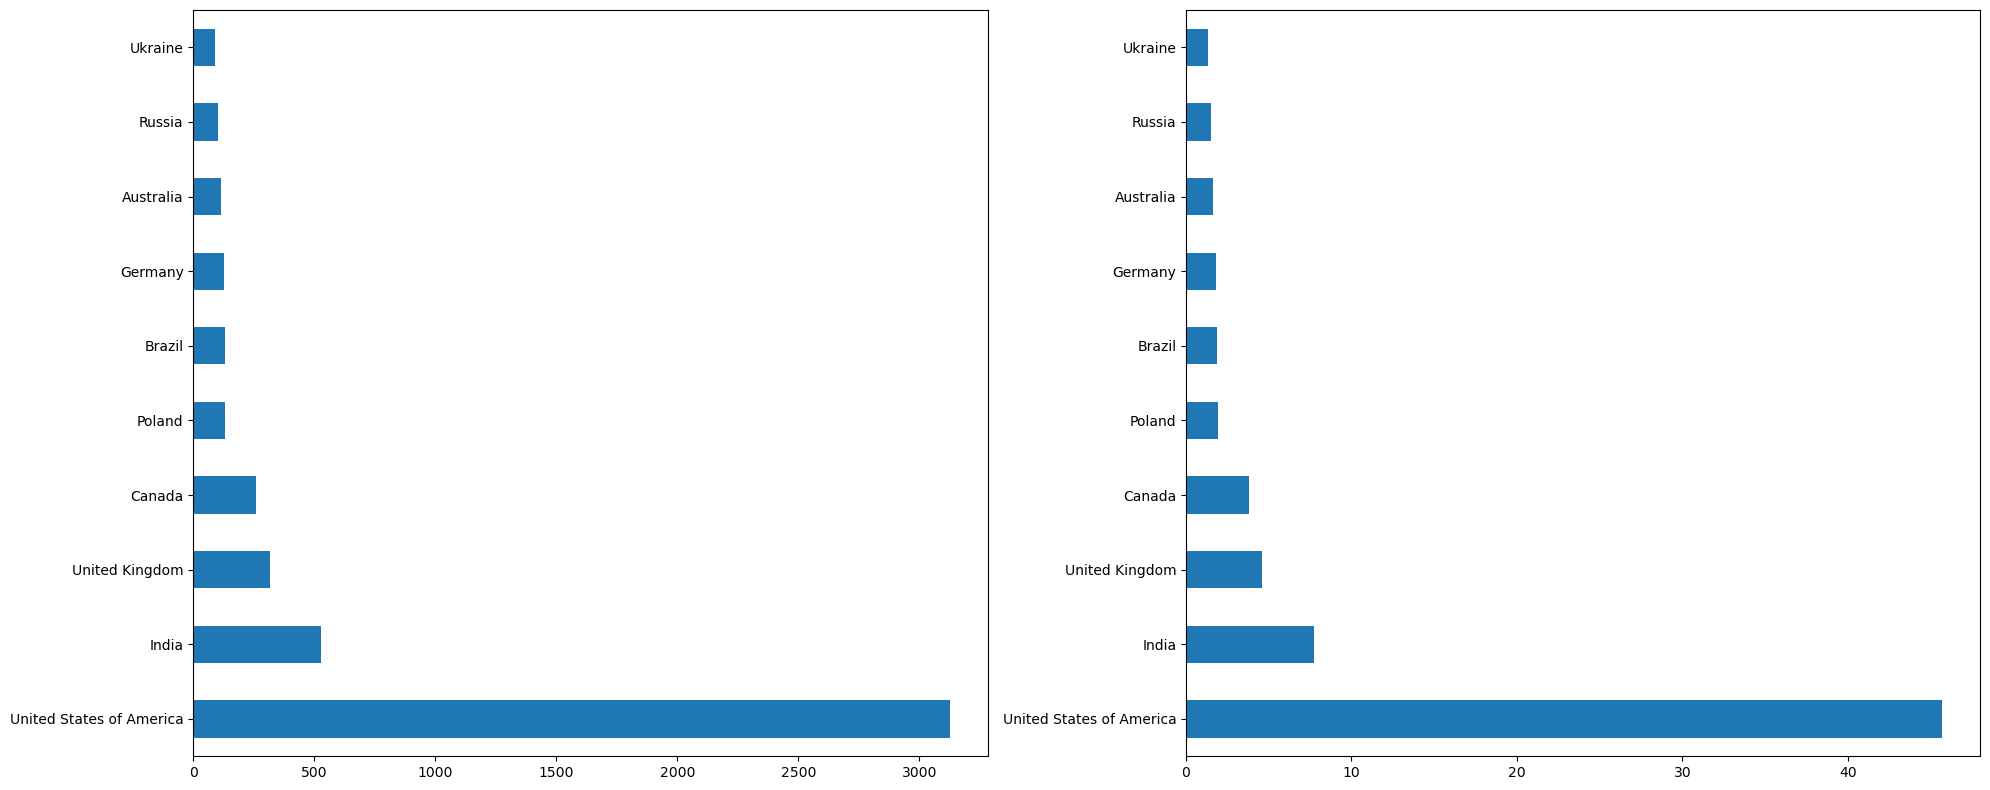

In [125]:
# Drop rows with null values for JobRoleInterest

survey_good = survey[survey['JobRoleInterest'].notnull()].copy()

# Create frequency tables for absolute and relative frequencies of CountryLive column
abs_country = survey_good['CountryLive'].value_counts()
rel_country = survey_good['CountryLive'].value_counts(normalize=True) * 100

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

abs_country.sort_values(ascending=False).head(10).plot.barh(ax=axes[0])
rel_country.sort_values(ascending=False).head(10).plot.barh(ax=axes[1])

plt.tight_layout()
plt.show()